<a href="https://colab.research.google.com/github/madhulraokadam/ml-projects-green-scale-datasets/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Decision Tree using Renewable Energy Adoption dataset**

## **1️⃣ Definition**

A **Decision Tree** is a **supervised machine learning algorithm** used for **classification and regression** tasks.

It works like a flowchart where:

* Each **internal node** represents a test on a feature
* Each **branch** represents the outcome of the test
* Each **leaf node** represents a final decision or prediction

It splits the dataset into smaller subsets based on feature values to make predictions.

---

## **2️⃣ Key Components**

### **Root Node**

The topmost node representing the entire dataset, where the first split occurs.

### **Decision Node**

A node where a decision is made based on a feature condition.

### **Leaf Node**

The final output node that gives the prediction.

### **Branch**

Represents the outcome of a decision.

---

## **3️⃣ How Decision Tree Works**

1. Start with the full dataset at the root node.
2. Choose the best feature using a splitting criterion.
3. Split the dataset into subsets.
4. Repeat splitting until stopping criteria are met.
5. Assign prediction values at leaf nodes.

---

## **4️⃣ Types of Decision Trees**

### **Classification Tree**

Used when target variable is categorical.

Example: Spam detection (Spam/Not Spam)

### **Regression Tree**

Used when target variable is continuous.

Example: Predict house price

---

## **5️⃣ Splitting Criteria**

### **⭐ Gini Index (Used in CART)**

Measures impurity of a node.

**Formula:**

Gini = 1 − Σ(pi²)

Lower Gini = better split.

---

### **⭐ Entropy (Used in ID3)**

Measures randomness.

**Formula:**

Entropy = − Σ pi log₂(pi)

---

### **⭐ Information Gain**

Measures reduction in entropy after split.

**Formula:**

IG = Entropy(parent) − Weighted Entropy(children)

Higher IG = better split.

---

### **⭐ Mean Squared Error (Regression)**

**Formula:**

MSE = (1/n) Σ (y − ŷ)²

---

## **6️⃣ Algorithms of Decision Trees**

### **ID3**

* Uses Entropy
* Works only for categorical features

### **C4.5**

* Improved version of ID3
* Handles continuous data
* Uses Gain Ratio

### **CART**

* Uses Gini Index
* Supports classification and regression
* Binary splits

---

## **7️⃣ Advantages**

* Easy to understand and interpret
* Requires little data preprocessing
* Works with numerical and categorical data
* Handles non-linear relationships
* Visual representation
* No need for feature scaling

---

## **8️⃣ Disadvantages**

* Overfitting problem
* Unstable with small data changes
* Can create biased trees
* Less accurate compared to ensemble methods
* Large trees become complex

---

## **9️⃣ Overfitting in Decision Trees**

Occurs when tree learns noise instead of patterns.

### **Methods to reduce overfitting**

* Pruning
* Setting max depth
* Minimum samples split
* Cross validation

---

## **🔟 Pruning**

Pruning removes unnecessary branches.

### **Pre-Pruning**

Stops tree growth early.

### **Post-Pruning**

Removes branches after tree is built.

---

## **1️⃣1️⃣ Applications**

* Finance → Credit risk prediction
* Healthcare → Disease diagnosis
* Email → Spam detection
* Marketing → Customer segmentation
* Real estate → Price prediction
* Manufacturing → Fault detection

---

## **1️⃣2️⃣ Decision Tree vs Other Algorithms**

**Decision Tree**

* High interpretability
* Handles non-linearity
* No feature scaling
* High overfitting risk

**Linear Regression**

* Medium interpretability
* Cannot handle non-linearity
* Requires scaling
* Lower overfitting

---

## **1️⃣3️⃣ Real Life Example**

A bank decides whether to approve a loan:

* Income > 50k?
* Credit score good?
* Employment stable?

Based on answers, decision is made.

---

## **1️⃣4️⃣ Evaluation Metrics**

### **For Classification**

* Accuracy
* Precision
* Recall
* F1 Score

### **For Regression**

* MSE
* RMSE
* R² Score

---

## **1️⃣5️⃣ Conclusion**

Decision Trees are powerful and simple machine learning models used for both classification and regression. They are easy to interpret and visualize but prone to overfitting. Proper pruning and parameter tuning improve performance. They form the foundation of advanced ensemble methods like Random Forest and Gradient Boosting.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

tree =pd.read_csv('/content/Renewable_Energy_Adoption.csv')
tree.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [ ]:
tree.shape

(100, 5)

In [ ]:
tree.info

<bound method DataFrame.info of     carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0         181.089042     128.286267            0.642032         0.732568   
1         382.750007     672.769370            0.084140         2.891096   
2         306.197880     382.920383            0.161629         2.932858   
3         259.530469     557.713622            0.898554         3.368435   
4         104.606524     916.809827            0.606429         3.767411   
..               ...            ...                 ...              ...   
95        222.828459     414.288617            0.522243         4.688408   
96        232.956490     753.360111            0.769994         4.362857   
97        199.639356     907.399234            0.215821         2.430473   
98         58.896694     898.377782            0.622890         3.878920   
99         87.761999     801.887991            0.085347         3.895443   

    adoption  
0          1  
1          0  
2          0  
3          0  
4          0  
..       ...  
95         0  
96         0  
97         0  
98         0  
99         0  

[100 rows x 5 columns]>

In [ ]:
tree.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [ ]:
tree.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
adoption,0


In [ ]:
tree.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'adoption'],
      dtype='object')

In [ ]:
X=tree[['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency']]
y=tree['adoption']

In [ ]:
X=tree[['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency']]
y=tree['adoption']
X_train, X_test, y_train, y_test = train_test_split(
    X,y, train_size=0.8, random_state=42
)

In [ ]:
tree_model = DecisionTreeClassifier()
#train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#predictions
tree_pred=tree_model.predict(X_test)
tree_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
#evaluation
tree = accuracy_score(y_test, tree_pred)
tree

0.9

In [ ]:
#confusion matrix
tree_cm = confusion_matrix(y_test, tree_pred)
tree_cm

array([[16,  1],
       [ 1,  2]])

In [ ]:
#classification report
tree_cr = classification_report(y_test, tree_pred)
print(tree_cr)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



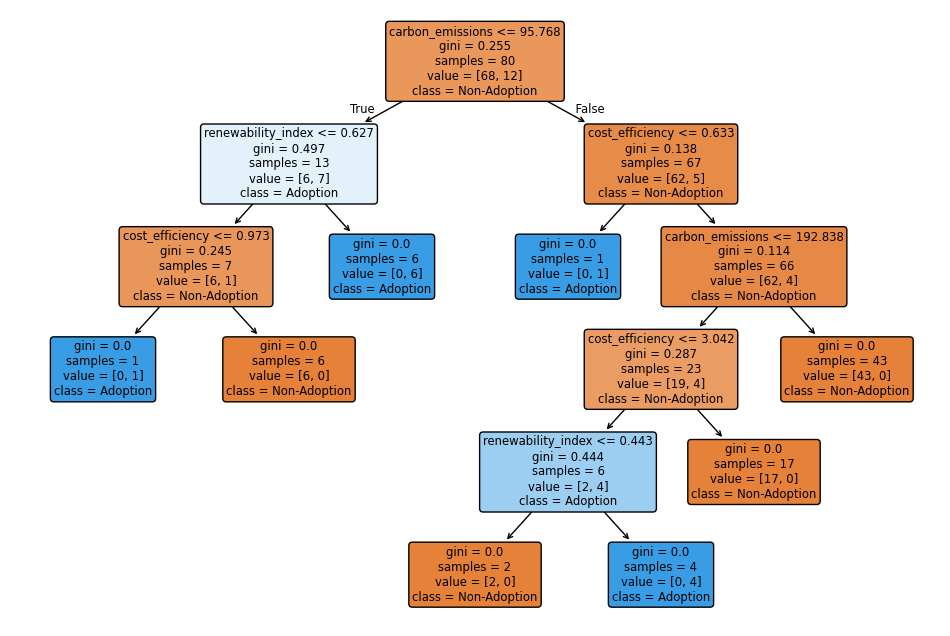

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree_model, feature_names=X.columns,
          class_names=['Non-Adoption', 'Adoption'],
          filled=True, rounded=True)
#plt.savefig('dlt.png')
plt.show()